In [8]:
import keras 
import matplotlib.pyplot as plt 
import numpy as np 

In [34]:
(x_train,y_trian),(x_test,y_test) = keras.datasets.mnist.load_data()

In [35]:
x_train.shape

(60000, 28, 28)

In [36]:
def plot_num(index): 
    plt.imshow(x_train[index])
    plt.title(f'Image of Num {y_trian[index]}')
    plt.axis('off')

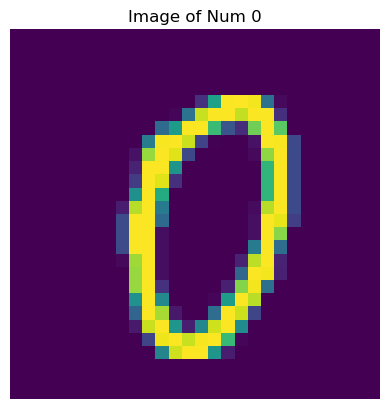

In [37]:
plot_num(1000)

In [38]:
# x_train = x_train/255 
# x_test = x_test / 255 

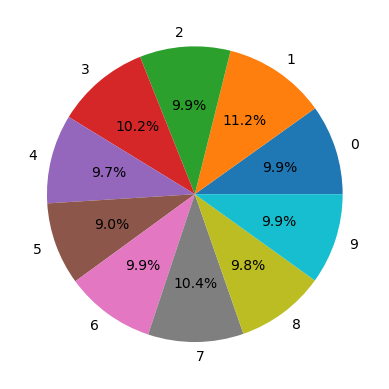

In [40]:
unique_values , values_Counts = np.unique(y_trian,return_counts=True)
plt.pie(values_Counts,labels=unique_values,autopct='%1.1f%%')
plt.show()

In [42]:
def select_num_images(y,num,max_num): 
    res = [] 
    for i in range(len(y)): 
        if num == y[i]: 
            res.append(i)
            if len(res) == max_num: 
                break 
    return res 

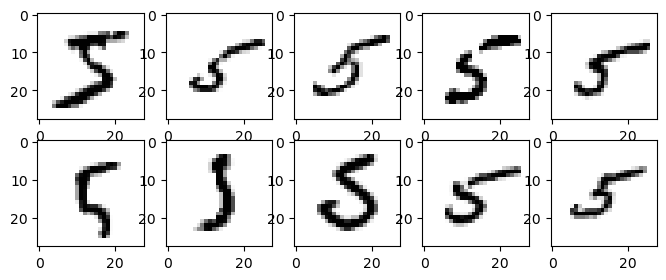

In [51]:
indexs_of_images = select_num_images(y_trian,5,10)

col = 5 
row = 5 
plt.figure(figsize=(8,8))

for i in range(len(indexs_of_images)): 
    plt.subplot(row,col,i+1)
    plt.imshow(x_train[indexs_of_images[i]],cmap=plt.cm.binary)
    # plt.axis('off')


In [52]:
x_train = x_train/255 
x_test = x_test / 255 

In [54]:
from keras.models import Sequential 
from keras.layers import Dense,Flatten 
from keras.losses import SparseCategoricalCrossentropy 
model = Sequential() 
model.add(Flatten(input_shape=x_train[0].shape,))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))


model.compile(optimizer='adam',loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

model.fit(x_train,y_trian,epochs=15)



Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8974 - loss: 0.3396
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9736 - loss: 0.0848
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9817 - loss: 0.0588
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9865 - loss: 0.0424
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9893 - loss: 0.0335
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9903 - loss: 0.0293
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9918 - loss: 0.0255
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9925 - loss: 0.0247
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9943 - loss: 0.0182
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9936 - loss: 0.0194
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9954 - loss: 0.0165
Epoch 12/15
1875/1875 ━━

In [55]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9752 - loss: 0.1429


[0.11625095456838608, 0.9793999791145325]

In [56]:
y_pred = model.predict(x_test)
y_pred = [ np.argmax(y) for y in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [58]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1001
           1       0.99      0.99      0.99      1144
           2       0.97      0.98      0.98      1021
           3       0.99      0.96      0.97      1045
           4       0.98      0.98      0.98       980
           5       0.97      0.99      0.98       876
           6       0.98      0.98      0.98       953
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.97       962
           9       0.97      0.98      0.98       990

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



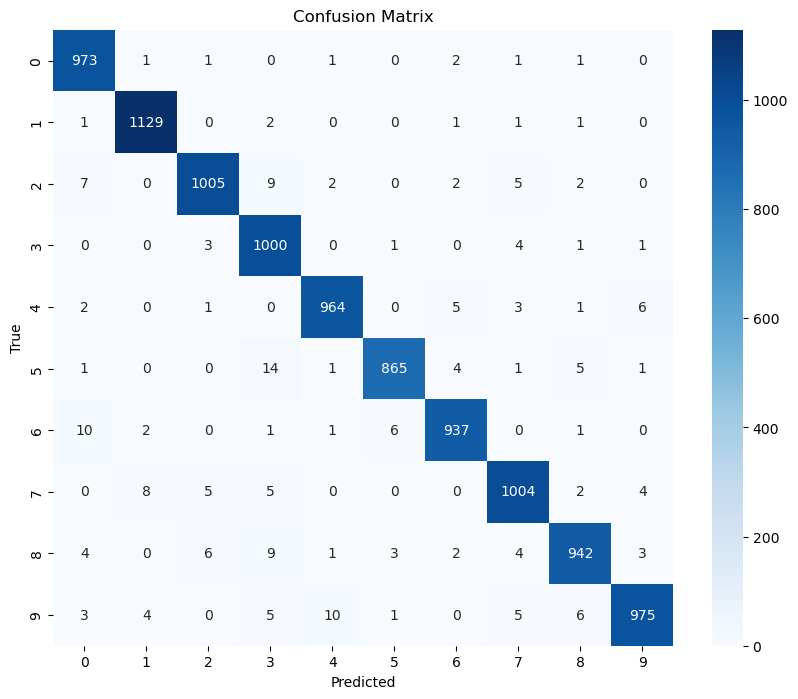

In [60]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()